In [1]:
# Импортирую все необходимые библиотеки для анализа и работы с данными
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 0. Считывание и Предобработка Данных
---

Данные о продажах в онлайн магазине. Имеется три таблицы с данными:
1. Информация о пользователях(клиентах) магазина

`customer_id` — позаказный идентификатор пользователя

`customer_unique_id` —  уникальный идентификатор пользователя  (аналог номера паспорта)

`customer_zip_code_prefix` —  почтовый индекс пользователя

`customer_city` —  город доставки пользователя

`customer_state` —  штат доставки пользователя

In [2]:
users_info = pd.read_csv('../M6.Project_First/olist_customers_dataset.csv') # Загрузили датасет с информацией о пользователях
users_info.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


---

2. Информация о заказах пользователей

`order_id` —  уникальный идентификатор заказа (номер чека)

`customer_id` —  позаказный идентификатор пользователя

`order_status` —  статус заказа

`order_purchase_timestamp` —  время создания заказа

`order_approved_at` —  время подтверждения оплаты заказа

`order_delivered_carrier_date` —  время передачи заказа в логистическую службу

`order_delivered_customer_date` —  время доставки заказа

`order_estimated_delivery_date` —  обещанная дата доставки

In [3]:
# Решил сразу перевести колонки с датами методом parse_dates в тип данных datetime64
orders_info = pd.read_csv('../M6.Project_First/olist_orders_dataset.csv',
    parse_dates = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
)
orders_info.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


---

3. Информация о товарах, входящих в заказы пользователей

`order_id` —  уникальный идентификатор заказа (номер чека)

`order_item_id` —  идентификатор товара внутри одного заказа

`product_id` —  ид товара (аналог штрихкода)

`seller_id` — ид производителя товара

`shipping_limit_date` —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике

`price` —  цена за единицу товара

`freight_value` —  вес товара

In [4]:
products_info = pd.read_csv('../M6.Project_First/olist_order_items_dataset.csv', parse_dates = ['shipping_limit_date'])
products_info.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


---

*Теперь, когда все данные загружены, можно посмотреть на типы данных, пропущенные значения и названия колонок*

In [5]:
print(f'''user_info:\n{users_info.dtypes}
        \n----\norders_info:\n{orders_info.dtypes}
        \n----\nproducts_info\n{products_info.dtypes}
        ''')


user_info:
customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object
        
----
orders_info:
order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object
        
----
products_info
order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object
        


*Видно, что все типы данных соответсвующие и подходят для дальнейшей работы*

*Теперь посмотрим на рамер датафреймов и пропущенные значения*

In [6]:
print(f'''user_info: {users_info.shape}\n----\norders_info: {orders_info.shape}\n----\nproducts_info: {products_info.shape} ''')

user_info: (99441, 5)
----
orders_info: (99441, 8)
----
products_info: (112650, 7) 


In [7]:
print(f'''user_info:\n{users_info.isna().sum()}
----\norders_info:\n{orders_info.isna().sum()}
----\nproducts_info:\n{products_info.isna().sum()}''')

user_info:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
----
orders_info:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
----
products_info:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


*В данных есть явные проблемы с заказами, так как некоторые записи даты отсутсвуют. В остальных данных полный порядок*

### Предварительно разберемся, что мы будем считать 'покупокой'

In [8]:
orders_info.order_status.unique() # Видими, что статус заказа может быть разный, что объясняет отсутсвие некоторых дат в данных

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

- *Если статус заказа 'delivered', значит все колонки даолжны быть заполнены соответсвующими датами. Проверим*

In [9]:
orders_info[orders_info.order_status == 'delivered'].isna().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
dtype: int64

- *Несмотря на то, что это доставленные заказы - небольшая часть данных отсутсвует. Тем не менее, я буду считать **данные заказы успешными**. Ведь, теоретически, клиет сам мог забрать свой товар*

### Вывод: Покупками будем считать заказы со статусами: delivered, processing и shipped.
- Данный статус заказу присваеватся только после оплаты;
- В данных нет дубликатов по order_id, т.е. в таблице не отображается хронология (created --> approved --> invoiced --> ...), статус скорее всего перезаписывается.

**По этим двум причинам, я принял решение о том, что буду считать покупкой**

In [10]:
successful_pay = ['delivered', 'processing', 'shipped'] # Для удобства записал эти статусы в один лист, чтобы потом к ним обращаться

---
Ниже предоставляю записи своих рассуждений

1. Решил посмотреть, сколько customer_id(позаказный идентификатор пользователя) приходится на customer_unique_id(уникальный идентификатор пользователя). Тем самым, узнаем сколько уникальный пользователь сделал заказов

In [11]:
users_info.groupby('customer_unique_id', as_index = False)['customer_id'].count().query('customer_id > 2')

,customer_unique_id,customer_id
1093,02e9109b7e0a985108b43e573b6afb23,3
1539,041caba6a63ace5818387698ea85cdb2,3
1588,043aee247e71edff7045664609f4d806,3
2495,06a52782a04f0086d16b9c22d0e29438,3
2908,07b1b60bca2b6326fa2adb259ea4a55f,3
...,...,...
95160,fd8ccc89be43894d2553494c71a61fd8,3
95463,fe59d5878cd80080edbd29b5a0a4e1cf,3
95534,fe81bb32c243a86b2f86fbf053fe6140,5
95784,ff36be26206fffe1eb37afd54c70e18b,3


2. Теперь сделал merge по полю customer_id с таблицей заказов и добавил поле с уникальными id пользователей, тем самым убедился, что: 
    1 - в заках нет хронологии; 
    2 - у уникального пользователся может быть больше 1 заказа.

In [12]:
orders_info.merge(users_info[['customer_unique_id', 'customer_id']], on = 'customer_id', how = 'left') \
    .query('customer_unique_id == "fd8ccc89be43894d2553494c71a61fd8"')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id
10169,bad9804e1f16ed9115e1373a6d5fb3fd,ae60b5e3a634bdf188825c1576bed6df,delivered,2018-04-19 08:19:39,2018-04-19 08:30:25,2018-04-19 23:13:03,2018-05-03 23:21:49,2018-05-16,fd8ccc89be43894d2553494c71a61fd8
67558,41907a6e6906a563e6dd54a19d77abcd,cb48d9ebf68a3d1e44c8e084b097b196,delivered,2018-03-13 07:45:39,2018-03-13 09:04:10,2018-03-13 18:05:48,2018-04-03 14:58:55,2018-05-08,fd8ccc89be43894d2553494c71a61fd8
82299,1b82cfd1e6a6d682ee254b2ff4cf387f,afb805d873cb119ec114720c630dc6d0,delivered,2018-03-11 22:52:36,2018-03-11 23:06:05,2018-03-19 19:11:47,2018-04-02 14:59:50,2018-03-29,fd8ccc89be43894d2553494c71a61fd8


---

## 1. Сколько у нас пользователей, которые совершили покупку только один раз?

*Чтобы найти пользователей, которые совершили покупку только один раз потребовалось: 1 - объединить данные о пользователях и заказах, потому что customer_id является уникальниым для каждго заказа, даже от одного пользователя; 2 - оставить пользователей, которые совершили покупку(см. пункт 0); 3 - сгруппировать данные по уникальным пользователям и посчитать их количество заказов; 4 - отфильтровать количество заказов на 1; 5 - посчитать общее число пользователей*

In [13]:
one_order_users = orders_info \
    .merge(users_info[['customer_id', 'customer_unique_id']], on = 'customer_id', how = 'left') \
    .query('order_status in @successful_pay') \
    .groupby('customer_unique_id') \
    .agg({'order_id': 'count'}) \
    .rename(columns = {'order_id': 'order_count'}) \
    .query('order_count == 1') \
    .count()

one_order_users

order_count    91814
dtype: int64

### Ответ: 91814 пользователей сервиса совершили только одну покупку

---

## 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

- *Чтобы найти среднее число недоставленных заказов в месяц, необходимо найти количество заказов которые не доставили в каждый месяц*

- *Недоставленный заказ будем считать заказ со статусом: "canceled", "unavailable"*

In [14]:
not_delivered = ['canceled', 'unavailable']

In [15]:
# Для удобства группировке по дате создам копию датафрейма orders_info и добавлю столбец даты без времени
not_delivered_orders = orders_info.query('order_status in @not_delivered')
not_delivered_orders['order_purchase_month'] = not_delivered_orders.order_purchase_timestamp.dt.to_period('M')
not_delivered_orders.head()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_month
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05,2017-11
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14,2018-08
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16,2018-01
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22,2018-01
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05,2017-08


In [16]:
number_of_not_delivered = not_delivered_orders \
    .groupby(['order_purchase_month', 'order_status'], as_index = False) \
    .agg({'order_id': 'count'}) \
    .rename(columns = {'order_id': 'orders_count'})
number_of_not_delivered.head()

,order_purchase_month,order_status,orders_count
0,2016-09,canceled,2
1,2016-10,canceled,24
2,2016-10,unavailable,7
3,2017-01,canceled,3
4,2017-01,unavailable,10


In [17]:
avg_undelivered_order_monthly = number_of_not_delivered \
    .groupby('order_status') \
    .agg({'orders_count': 'mean'}).round(2) \
    .rename(columns = {'orders_count': 'avg_orders'})
avg_undelivered_order_monthly

,avg_orders
order_status,
canceled,26.04
unavailable,29.00


### Ответ:
    - Для статуса "canceled": 26.04
    - Для статуса "unavailable": 29.00

---

## Причины недоставленных заказов

- *Как было упомянуто ранее, есть два статуса, идентифицирующие, что заказ не доставлен: отменен и недоступен. Попробудем разобраться с каждым статусом заказа и выявить закономерности*

**1. Разберем заказы со статусом "unavailable"**

In [18]:
unavailable_orders = orders_info.query('order_status == "unavailable"')
unavailable_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05
737,d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaT,NaT,2018-02-06
1160,2f634e2cebf8c0283e7ef0989f77d217,7353b0fb8e8d9675e3a704c60ca44ebe,unavailable,2017-09-27 20:55:33,2017-09-28 01:32:50,NaT,NaT,2017-10-27


In [19]:
unavailable_orders.isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     609
order_delivered_customer_date    609
order_estimated_delivery_date      0
dtype: int64

- У заказов со статусом "unavailable" есть определенная закономерность: все заказы были созданы и подтверждены. 
Есть одна гипотеза: **заказы могут не отправлять в некоторые штаты или города**

In [20]:
unavailable_orders_city = unavailable_orders \
    .merge(users_info[['customer_id', 'customer_city', 'customer_state']], on = 'customer_id', how = 'left') \
    .groupby(['customer_state', 'customer_city'], as_index = False) \
    .agg({'order_id': 'count'})
unavailable_orders_city.head()

,customer_state,customer_city,order_id
0,AL,maceio,1
1,AM,manaus,1
2,BA,caetanos,1
3,BA,casa nova,1
4,BA,esplanada,1


- *Я нашел штаты и города клиентов со статусом "unavailable". А теперь проверим, есть ли заказы со статусом 'delivered' в эти города*

In [21]:
cities_unavailable_orders = unavailable_orders_city.customer_city

In [22]:
delivered_orders_cities = orders_info \
    .query('order_status == "delivered"') \
    .merge(users_info[['customer_id', 'customer_city', 'customer_state']], on = 'customer_id', how = 'left') \
    .query('customer_city in @cities_unavailable_orders')
delivered_orders_cities.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,sao paulo,SP
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,santo andre,SP
8,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23,sorocaba,SP
9,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,2017-05-16 19:50:18,2017-05-18 11:40:40,2017-05-29 11:18:31,2017-06-07,rio de janeiro,RJ
10,34513ce0c4fab462a55830c0989c7edb,7711cf624183d843aafe81855097bc37,delivered,2017-07-13 19:58:11,2017-07-13 20:10:08,2017-07-14 18:43:29,2017-07-19 14:04:48,2017-08-08,sao paulo,SP


* **Первая гипотеза оказалась неверной.** Почти во всех городах есть заказы со статусом 'delivered'*

In [23]:
cities_unavailable_orders[~cities_unavailable_orders.isin(delivered_orders_cities.customer_city)]

2                     caetanos
32                   pirapemas
100                 jataizinho
127                     lidice
160    doutor mauricio cardoso
167        sao domingos do sul
169            alto bela vista
244            monteiro lobato
Name: customer_city, dtype: object

- **Гипотеза 2: Заказ недоступен для отправки по причинам: вес товара или максимальная дата доставки продавцом для передачи заказа партнеру по логистике**

In [24]:
unavailable_orders_products = unavailable_orders \
    .merge(products_info, on = 'order_id', how = 'left')
unavailable_orders_products.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05,NaN,NaN,NaN,NaT,NaN,NaN
1,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16,NaN,NaN,NaN,NaT,NaN,NaN
2,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05,NaN,NaN,NaN,NaT,NaN,NaN
3,d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaT,NaT,2018-02-06,NaN,NaN,NaN,NaT,NaN,NaN
4,2f634e2cebf8c0283e7ef0989f77d217,7353b0fb8e8d9675e3a704c60ca44ebe,unavailable,2017-09-27 20:55:33,2017-09-28 01:32:50,NaT,NaT,2017-10-27,NaN,NaN,NaN,NaT,NaN,NaN


In [25]:
unavailable_orders_products.isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     610
order_delivered_customer_date    610
order_estimated_delivery_date      0
order_item_id                    603
product_id                       603
seller_id                        603
shipping_limit_date              603
price                            603
freight_value                    603
dtype: int64

- *Видим интересную картину - почти у всех заказов нет никаких данных о продукте, продавце и т.д.*

In [26]:
unavailable_orders_products_2 = unavailable_orders_products[~unavailable_orders_products.seller_id.isna()]
unavailable_orders_products_2

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
194,dc18a044b56ed174037ca164cdf2e921,4a06381959b6670756de02e07b83815f,unavailable,2016-10-05 14:16:28,2016-10-06 15:56:49,NaT,NaT,2016-11-29,1.0,faa268ecc8a8434cb4ebee091b3222d6,f0563bacf40c311f1c4d3d6b67b8a7a7,2016-10-21 16:18:52,1199.00,28.78
304,4dd47e84e6b8ff4a63d0b8425e6d788e,96bbcbc8372c86da857d842dfda6bd72,unavailable,2016-10-06 23:49:18,2016-10-07 01:09:08,NaT,NaT,2016-11-24,1.0,2aa489c905e1d41d8c716a6d6912d8c2,620c87c171fb2a6dd6e8bb4dec959fc6,2016-10-11 01:09:09,299.90,13.68
361,3c3ca08854ca922fe8e9cedfd6841c8a,88c36fbd3df96094f90f0315e1d2dd90,unavailable,2016-10-08 12:13:38,2016-10-08 13:21:35,NaT,NaT,2016-11-30,1.0,ac6c24af9f913c9375a3ea77883bda6e,5206cc4bc2297c833e6061c49bf9c43f,2016-10-12 13:21:35,35.00,10.96
368,54bb06e1ca86bd99ee2a8d6288bf4ede,98bfbf477ed9f40a0264f5e527a446be,unavailable,2016-10-06 13:38:39,2016-10-06 14:22:19,NaT,NaT,2016-12-12,1.0,bef13288a0f8b26d763411ced1dfa268,cf281cf8b7affbdfe751b29cc85580e1,2016-10-29 09:43:46,64.90,25.33
479,1a47da1d66c70489c8e35fe2b5433ab7,3d8e326c3cef3a9bba7ca121baac5fc3,unavailable,2016-10-07 18:16:31,2016-10-07 18:53:48,NaT,NaT,2016-12-07,1.0,eba7488e1c67729f045ab43fac426f2e,620c87c171fb2a6dd6e8bb4dec959fc6,2016-10-11 18:53:48,249.90,20.85
515,2fd1c83dd4714cf3cf796fffb6c8de62,7f51c513004ef3f35e834c142f286778,unavailable,2016-10-05 17:21:29,2016-10-06 15:55:40,NaT,NaT,2016-11-29,1.0,17c7ec33a1657924ad493e6978b4bf91,3d01d1c414c44b5943a09619ff3853cb,2016-10-10 15:55:42,99.00,9.12
516,2fd1c83dd4714cf3cf796fffb6c8de62,7f51c513004ef3f35e834c142f286778,unavailable,2016-10-05 17:21:29,2016-10-06 15:55:40,NaT,NaT,2016-11-29,2.0,966a067b38634929844120e39b1576bc,61f159ef6da2d441951d2c0efa719362,2016-10-10 15:55:41,59.99,24.08


- *Все же есть несколько заказов, у которых все данные о продукте имеются имеются. Посмотрим на города доставки этих клиентов*

In [27]:
unavailable_orders_products_2.merge(users_info[['customer_id', 'customer_city']], on = 'customer_id', how = 'left')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_city
0,dc18a044b56ed174037ca164cdf2e921,4a06381959b6670756de02e07b83815f,unavailable,2016-10-05 14:16:28,2016-10-06 15:56:49,NaT,NaT,2016-11-29,1.0,faa268ecc8a8434cb4ebee091b3222d6,f0563bacf40c311f1c4d3d6b67b8a7a7,2016-10-21 16:18:52,1199.00,28.78,vargem grande paulista
1,4dd47e84e6b8ff4a63d0b8425e6d788e,96bbcbc8372c86da857d842dfda6bd72,unavailable,2016-10-06 23:49:18,2016-10-07 01:09:08,NaT,NaT,2016-11-24,1.0,2aa489c905e1d41d8c716a6d6912d8c2,620c87c171fb2a6dd6e8bb4dec959fc6,2016-10-11 01:09:09,299.90,13.68,campos dos goytacazes
2,3c3ca08854ca922fe8e9cedfd6841c8a,88c36fbd3df96094f90f0315e1d2dd90,unavailable,2016-10-08 12:13:38,2016-10-08 13:21:35,NaT,NaT,2016-11-30,1.0,ac6c24af9f913c9375a3ea77883bda6e,5206cc4bc2297c833e6061c49bf9c43f,2016-10-12 13:21:35,35.00,10.96,suzano
3,54bb06e1ca86bd99ee2a8d6288bf4ede,98bfbf477ed9f40a0264f5e527a446be,unavailable,2016-10-06 13:38:39,2016-10-06 14:22:19,NaT,NaT,2016-12-12,1.0,bef13288a0f8b26d763411ced1dfa268,cf281cf8b7affbdfe751b29cc85580e1,2016-10-29 09:43:46,64.90,25.33,aracariguama
4,1a47da1d66c70489c8e35fe2b5433ab7,3d8e326c3cef3a9bba7ca121baac5fc3,unavailable,2016-10-07 18:16:31,2016-10-07 18:53:48,NaT,NaT,2016-12-07,1.0,eba7488e1c67729f045ab43fac426f2e,620c87c171fb2a6dd6e8bb4dec959fc6,2016-10-11 18:53:48,249.90,20.85,porto alegre
5,2fd1c83dd4714cf3cf796fffb6c8de62,7f51c513004ef3f35e834c142f286778,unavailable,2016-10-05 17:21:29,2016-10-06 15:55:40,NaT,NaT,2016-11-29,1.0,17c7ec33a1657924ad493e6978b4bf91,3d01d1c414c44b5943a09619ff3853cb,2016-10-10 15:55:42,99.00,9.12,belo horizonte
6,2fd1c83dd4714cf3cf796fffb6c8de62,7f51c513004ef3f35e834c142f286778,unavailable,2016-10-05 17:21:29,2016-10-06 15:55:40,NaT,NaT,2016-11-29,2.0,966a067b38634929844120e39b1576bc,61f159ef6da2d441951d2c0efa719362,2016-10-10 15:55:41,59.99,24.08,belo horizonte


- **Гипотеза 3: Заказ недоступен только у небольшой группы пользователей**

In [28]:
unavailable_orders_products \
    .merge(users_info[['customer_id', 'customer_unique_id']], on = 'customer_id', how = 'left') \
    .groupby('customer_unique_id', as_index = False) \
    .agg({'order_id': 'count'})

,customer_unique_id,order_id
0,004ad212c650c96c8a48f30855a7bcb8,1
1,0071f46a072a9ae25bbe4438b15efe9c,1
2,013b083525868a0437652ebf071cda03,1
3,020d46eecb7bda2b3ab2316a91bb49f6,1
4,027b5658f8a94a67c3d037047ca849c5,1
...,...,...
599,fe163b538b9f14ce8e554c1ebcc66527,1
600,feb643dc81ca576d83810f147e0e089c,1
601,ff222edf83338ca6b35f8e29871fa07a,1
602,ff28720521c749234b1ba19c9c986f4c,1


- *Видно, что это не так. У 604 уникальных пользователей есть этот статус.*

### Вывод: 
    1. Статус заказа "unavailable" никак не связан с городом доставки клиента;
    2. У большинства заказов со статусом "unavailable" нет никакой информации из таблица products_info;
    3. Нет "определнных" пользователей, у которых этот статус появляется чаще всего.

**2. Разберем заказы со статусом "canceled"**

- У заказов со статусом "canceled" может быть достаточно много причин, по которым заказ не был доставлен. Так как в таблице нет хронологии по статусам заказов, сложно будет сделать точный вывод. Тем не менее, попробуем найти закономерности по имеющимся данным.

1. Посмотрим на таблицу с отмененными заказами

In [29]:
orders_info.query('order_status == "canceled"').isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                141
order_delivered_carrier_date     550
order_delivered_customer_date    619
order_estimated_delivery_date      0
dtype: int64

In [30]:
orders_info.query('order_status == "canceled"').dropna()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
2921,1950d777989f6a877539f53795b4c3c3,1bccb206de9f0f25adc6871a1bcf77b2,canceled,2018-02-19 19:48:52,2018-02-19 20:56:05,2018-02-20 19:57:13,2018-03-21 22:03:51,2018-03-09
8791,dabf2b0e35b423f94618bf965fcb7514,5cdec0bb8cbdf53ffc8fdc212cd247c6,canceled,2016-10-09 00:56:52,2016-10-09 13:36:58,2016-10-13 13:36:59,2016-10-16 14:36:59,2016-11-30
58266,770d331c84e5b214bd9dc70a10b829d0,6c57e6119369185e575b36712766b0ef,canceled,2016-10-07 14:52:30,2016-10-07 15:07:10,2016-10-11 15:07:11,2016-10-14 15:07:11,2016-11-29
59332,8beb59392e21af5eb9547ae1a9938d06,bf609b5741f71697f65ce3852c5d2623,canceled,2016-10-08 20:17:50,2016-10-09 14:34:30,2016-10-14 22:45:26,2016-10-19 18:47:43,2016-11-30
92636,65d1e226dfaeb8cdc42f665422522d14,70fc57eeae292675927697fe03ad3ff5,canceled,2016-10-03 21:01:41,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25
94399,2c45c33d2f9cb8ff8b1c86cc28c11c30,de4caa97afa80c8eeac2ff4c8da5b72e,canceled,2016-10-09 15:39:56,2016-10-10 10:40:49,2016-10-14 10:40:50,2016-11-09 14:53:50,2016-12-08


- Определенных закономерностей здесь не вижу. Можно отметить, что большинство заказов было отменено поле подтверждения заказа. Есть предположение, что это связано с оплатой заказа, так как оплата идет после подтверждения. Также, есть отмененные заказы на этапе доставки и после вручения.

2. Посмотрим в каких городах и штатах закзы отменяют чаще всего

In [31]:
orders_info \
    .query('order_status == "canceled"') \
    .merge(users_info[['customer_id', 'customer_city', 'customer_state']], on = 'customer_id', how = 'left') \
    .groupby(['customer_city', 'customer_state'], as_index = False) \
    .agg({'order_id': 'count'}) \
    .rename(columns = {'order_id': 'orders_count'}) \
    .sort_values('orders_count', ascending = False) \
    .head(5)

,customer_city,customer_state,orders_count
213,sao paulo,SP,140
189,rio de janeiro,RJ,48
27,belo horizonte,MG,17
94,guarulhos,SP,13
48,campinas,SP,11


- Топ 5 городов по отменам. Видно, что город "sao paulo" явятся рекодсменом по отменам заказов.

### Вывод:
    1. Многие заказы отменяются после подтверждения заказа. Вероятная причина - отсутствие оплаты заказа
    2. Небольшая часть заказов отменена после вручения клиенту. Вероятная причина - неудовлетворительное качество
    3. Чаще всего заказы отменяют в городе "sao paulo"

---

## 3. По каждому товару определить, в какой день недели товар чаще всего покупается.

- Чтобы найти в какой день недели товар чаще всего покупался необходимо:
    1. Вспомнить, что такое покупка и отфильтровать таблицу orders_info по купленным заказам
    2. Объединить таблицу orders_info с products_info по полю "order_id". Чтобы таблица не было слишком длинной, добавим только один стобец - product_id
    3. Сгруппировать таблицу по полям: "product_id" и "day_of_week" и посчитать кол-во заказов в этот день

In [32]:
paid_orders = orders_info \
    .query('order_status in @successful_pay') \
    .merge(products_info[['order_id', 'product_id']], on = 'order_id', how = 'left')
paid_orders['day_of_week'] = paid_orders.order_purchase_timestamp.dt.day_name() # Перевел дату в день недели
paid_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,day_of_week
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,87285b34884572647811a353c7ac498a,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,595fac2a385ac33a80bd5114aec74eb8,Tuesday
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,aa4383b373c6aca5d8797843e5594415,Wednesday
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,d0b61bfb1de832b15ba9d266ca96e5b0,Saturday
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,65266b2da20d04dbe00c5c2d3bb7859e,Tuesday


In [33]:
purchased_products_per_dow = paid_orders \
    .groupby(['product_id', 'day_of_week'], as_index = False) \
    .agg({'order_id': 'count'}) \
    .rename(columns = {'order_id': 'orders_count'})
purchased_products_per_dow.head()

,product_id,day_of_week,orders_count
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1
2,0009406fd7479715e4bef61dd91f2462,Thursday,1
3,000b8f95fcb9e0096488278317764d19,Friday,1
4,000b8f95fcb9e0096488278317764d19,Wednesday,1


    4. С помощью метода transform(max) (аналог оконной функции в SQL) найдем максимальные значения order_counts не группируя данные

In [34]:
purchased_products_per_dow['max_orders'] = purchased_products_per_dow.groupby('product_id')['orders_count'].transform(max)

    5. Теперь сравним колонки orders_count и max_orders и выведем результирующий датафрейм. Таким образом, мы учтем товары, которые могли покупаться одинаково максимально в разные дни недели

In [35]:
most_purchased_products = purchased_products_per_dow[purchased_products_per_dow['orders_count'] == purchased_products_per_dow['max_orders']][['product_id', 'day_of_week', 'max_orders']]
most_purchased_products.head()

,product_id,day_of_week,max_orders
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1
2,0009406fd7479715e4bef61dd91f2462,Thursday,1
3,000b8f95fcb9e0096488278317764d19,Friday,1
4,000b8f95fcb9e0096488278317764d19,Wednesday,1


### Ответ: Датафрейм most_purchased_products содержит всю информацию

---

## 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)?

- *Во-первых, необходимо найти кол-во покупок, который совершил пользователь за целый месяц*

In [36]:
successful_orders = orders_info.query('order_status in @successful_pay')

successful_orders['purchase_date'] = successful_orders.order_purchase_timestamp.dt.to_period('M') # Привел колонку к месяцу

orders_per_user = successful_orders \
    .merge(users_info[['customer_id', 'customer_unique_id']], on = 'customer_id', how = 'left') \
    .groupby(['customer_unique_id', 'purchase_date'], as_index = False) \
    .agg({'order_id': 'count'}) \
    .rename(columns = {'order_id': 'orders_count'})

orders_per_user.head()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,customer_unique_id,purchase_date,orders_count
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1
2,0000f46a3911fa3c0805444483337064,2017-03,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11,1


- *Во-вторых, чтобы учесть, что в месяце может быть не целое число недель, почитаю кол-во дней в месяце с помощью метода dt.days_in_month и разделю данное число на кол-во дней в одной неделе*

In [37]:
orders_per_user['week_count'] = orders_per_user.purchase_date.dt.days_in_month / 7
orders_per_user.head()

,customer_unique_id,purchase_date,orders_count,week_count
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1,4.428571
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1,4.428571
2,0000f46a3911fa3c0805444483337064,2017-03,1,4.428571
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,1,4.428571
4,0004aac84e0df4da2b147fca70cf8255,2017-11,1,4.285714


- *Наконец, чтобы узнать, сколько в среднем каждый пользователь совершает покупоку в неделю по месяцам, необходимо поделить количество заказов у пользователся в каждый месяц на кол-во недель в месяце*

In [38]:
orders_per_user['avg_purchases_weekly'] = orders_per_user.orders_count / orders_per_user.week_count

avg_orders_per_user_weekly = orders_per_user[['customer_unique_id', 'purchase_date', 'avg_purchases_weekly']].sort_values('avg_purchases_weekly', ascending = False)

avg_orders_per_user_weekly.head()

,customer_unique_id,purchase_date,avg_purchases_weekly
7214,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01,1.354839
68340,b4e4f24de1e8725b74e4a1f4975116ed,2018-02,1.000000
23576,3e43e6105506432c953e165fb2acf44c,2018-02,1.000000
61252,a239b8e2fbce33780f1f1912e2ee5275,2017-02,1.000000
14263,25a560b9a6006157838aab1bdbd68624,2017-04,0.933333


### Ответ: датафрейм avg_orders_per_user_weekly содержит всю информацию

---

# Когортный анализ пользователей

## 5. В период с января по декабрь выявите когорту с самым высоким retention на 3-й месяц.

**Шаг 1: Признак формирования когорты - покупка**

**Шаг 2: Размер когорты - один месяц**

**Шаг 3: Отчетный период: 2016 - 2018 гг**

**Шаг 4: Анализируемый ключевой показатель - Retention Rate**

- *Retention rate — коэффициент удержания клиентов. Он показывает долю пользователей, которые вернулись в приложение спустя N дней, недель или месяцев после своего первого входа — метрику можно рассчитывать по любым периодам, которые интересуют.*

*На первом этпапе необходимо отфильтровать заказы по стутусу (покупка) и присоединить колонку по уникальным id клиентов*

In [39]:
first_order = orders_info \
    .query('order_status in @successful_pay') \
    .merge(users_info[['customer_id', 'customer_unique_id']], on = 'customer_id', how = 'left')[['customer_unique_id', 'order_purchase_timestamp', 'order_id']]

first_order.head()

,customer_unique_id,order_purchase_timestamp,order_id
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,e481f51cbdc54678b7cc49136f2d6af7
1,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37,53cdb2fc8bc7dce0b6741e2150273451
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49,47770eb9100c2d0c44946d9cf07ec65d
3,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06,949d5b44dbf5de918fe9c16f97b45f8a
4,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 21:18:39,ad21c59c0840e6cb83a9ceb5573f8159


*Далее необходимо найти период (год-месяц), когда каждый пользователь сделал первый заказ. Воспользуюсь методом transform, чтобы не менять группировку исходного датафрейма*

In [40]:
first_order['order_month'] = first_order.order_purchase_timestamp.dt.to_period('M') # Привел дату к периоду 'YYYY-MM'

first_order['first_order_month'] = first_order.groupby('customer_unique_id')['order_month'].transform(min) # Добавил новый столбец с первой датой (периодом) покупки

first_order = first_order[['customer_unique_id', 'first_order_month', 'order_month']] # Выбрал самые необходимые данные для анализа

first_order.head()

,customer_unique_id,first_order_month,order_month
0,7c396fd4830fd04220f754e42b4e5bff,2017-09,2017-10
1,af07308b275d755c9edb36a90c618231,2018-07,2018-07
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08,2018-08
3,7c142cf63193a1473d2e66489a9ae977,2017-11,2017-11
4,72632f0f9dd73dfee390c9b22eb56dd6,2018-02,2018-02


*Теперь, имея все необходимые данные рассчитаем показатель Retention. Сгруппирую данные по столбцу с датой (периодом) первой покупки и посчитаю количество уникальных пользователей - таким образом получается когорта*

In [41]:
retention_rate = first_order \
    .groupby(['first_order_month', 'order_month'], as_index = False) \
    .agg({'customer_unique_id': 'nunique'}) \
    .rename(columns = {'customer_unique_id': 'customer_count'})

retention_rate.head()

,first_order_month,order_month,customer_count
0,2016-09,2016-09,2
1,2016-10,2016-10,272
2,2016-10,2017-04,1
3,2016-10,2017-07,1
4,2016-10,2017-09,1


*Не всегда удобно работать с абсолютными величинами, как число пользователей в когорте, поэтому переведу эту колонку в относительную величену - отношение пользователей когорты к пользователям за весь период в данной когорте. Для этого, не меняя группировки, найду максимальное число клиентов для каждой когорты и поделю два этих столбца*

In [42]:
retention_rate['max_customers'] = retention_rate.groupby('first_order_month')['customer_count'].transform(max)

retention_rate = retention_rate.assign(customer_share = (retention_rate.customer_count / retention_rate.max_customers))

retention_rate.head()

,first_order_month,order_month,customer_count,max_customers,customer_share
0,2016-09,2016-09,2,2,1.000000
1,2016-10,2016-10,272,272,1.000000
2,2016-10,2017-04,1,272,0.003676
3,2016-10,2017-07,1,272,0.003676
4,2016-10,2017-09,1,272,0.003676


*Наконец, можно сделать данные более "читабельными" и представить отчетный период в виде целых чисел. 0 - начало когорты; 1 - один месяц после первой покупки; 2 - два месяца после покупки; и т.д. Для этого необходимо найти разность двух периодов: период - период первой покупки*

- *Чтобы разность периодов отображаль корректо, необходимо к каждому значению разности применить атрибут "n" через lambda-функцию, чтобы извлелчь число из серии*

In [43]:
retention_rate = retention_rate.assign(month_diff = (retention_rate.order_month - retention_rate.first_order_month).apply(lambda x: x.n))

retention_rate.head()

,first_order_month,order_month,customer_count,max_customers,customer_share,month_diff
0,2016-09,2016-09,2,2,1.000000,0
1,2016-10,2016-10,272,272,1.000000,0
2,2016-10,2017-04,1,272,0.003676,6
3,2016-10,2017-07,1,272,0.003676,9
4,2016-10,2017-09,1,272,0.003676,11


*Теперь представим таблицу в более "читабельном" виде - сделаем сводную таблицу (pivot table)*

In [44]:
retention_style = (retention_rate.pivot(index = 'first_order_month', columns = 'month_diff', values = 'customer_share')
            .style
            .set_caption('Customer retention by cohort')  # добавляем подпись
            .background_gradient(cmap='viridis')  # раскрашиваем ячейки по столбцам
            .highlight_null('white')  # делаем белый фон для значений NaN
            .format("{:.2%}", na_rep=""))  # числа форматируем как проценты, NaN заменяем на пустоту

retention_style

month_diff,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
first_order_month,,,,,,,,,,,,,,,,,,,,
2016-09,100.00%,,,,,,,,,,,,,,,,,,,
2016-10,100.00%,,,,,,0.37%,,,0.37%,,0.37%,,0.37%,,0.37%,,0.37%,0.74%,0.74%
2016-12,100.00%,100.00%,,,,,,,,,,,,,,,,,,
2017-01,100.00%,0.41%,0.27%,0.14%,0.41%,0.14%,0.41%,0.14%,0.14%,,0.41%,0.14%,0.68%,0.41%,0.14%,0.14%,0.27%,0.41%,0.14%,
2017-02,100.00%,0.24%,0.30%,0.12%,0.42%,0.12%,0.24%,0.18%,0.12%,0.18%,0.12%,0.30%,0.12%,0.18%,0.12%,0.06%,0.06%,0.24%,,
2017-03,100.00%,0.51%,0.35%,0.39%,0.35%,0.16%,0.16%,0.31%,0.35%,0.08%,0.35%,0.12%,0.23%,0.12%,0.16%,0.23%,0.08%,0.16%,,
2017-04,100.00%,0.61%,0.22%,0.17%,0.30%,0.26%,0.35%,0.30%,0.30%,0.17%,0.26%,0.09%,0.04%,0.04%,0.09%,0.09%,0.13%,,,
2017-05,100.00%,0.48%,0.48%,0.40%,0.31%,0.34%,0.43%,0.14%,0.26%,0.26%,0.26%,0.34%,0.26%,0.03%,0.20%,0.23%,,,,
2017-06,100.00%,0.45%,0.36%,0.39%,0.26%,0.36%,0.36%,0.23%,0.13%,0.23%,0.32%,0.32%,0.16%,0.13%,0.19%,,,,,


*Ответим на вопрос задания и найдем когорту с максимальным значением Retention на 3-й месяц*

In [45]:
retention_rate.pivot(index = 'first_order_month', columns = 'month_diff', values = 'customer_share')[3].idxmax()

Period('2017-05', 'M')

### Ответ: Когорта - '2017-05' имеет максимальный показатель Retention на 3-й месяц

### Вывод: заметно, что большая часть пользователей не возвращается в магазин. 

---

## 6. Построим RFM-сегментацию пользователей.

RFM-сегментация - это:
 1. Recency(Недавность): Время от последней покупки пользователя до текущей даты.
 2. Frequency(Частота): Суммарное количество покупок у пользователя за всё время.
 3. Monetary(Монетизация): Сумма покупок за всё время.

- *Для первого пункта выберу дату, которая ближе к последней дате заказа в датафрейме, так как разница между сегодняшним днем и последней датой в датафрейме велика и это будет тяжело воспринимать*

In [46]:
paid_orders_info = orders_info \
    .query('order_status in @successful_pay') \
    .merge(users_info[['customer_id', 'customer_unique_id']], on = 'customer_id', how = 'left') \
    .merge(products_info[['order_id', 'price']], on = 'order_id', how = 'left')

paid_orders_info['order_purchase_timestamp'] = paid_orders_info.order_purchase_timestamp.dt.date # Для удобства оставлю только дату зказа

In [47]:
paid_orders_info.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,price
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,19.90


### 6.1 Найдем RFM-метрики

*Установлю дату, которая на день позже последней покупки, чтобы сравнивать показатель Recency с ней*

In [48]:
now = paid_orders_info.order_purchase_timestamp.max() + pd.Timedelta(days = 1)

In [49]:
rfm_info = paid_orders_info \
    .groupby('customer_unique_id', as_index = False) \
    .agg({
    'order_purchase_timestamp': 'max',
    'order_id': 'count',
    'price': 'sum'
}) \
    .rename(columns = {
    'order_purchase_timestamp': 'last_purchase',
    'order_id': 'frequency',
    'price': 'monetary'
})

In [50]:
rfm_info['recency'] = (now - rfm_info.last_purchase)

rfm_info['recency'] = rfm_info.recency.astype('timedelta64[D]').astype('int') # для удобства перевел сразу в тип данных int

rfm_info = rfm_info.drop(columns = ['last_purchase']).reindex(columns = ['customer_unique_id', 'recency', 'frequency', 'monetary'])

In [51]:
rfm_info.head()

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,120,1,18.90
2,0000f46a3911fa3c0805444483337064,543,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,327,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,294,1,180.00


### 6.2 Градация пользователей по RFM-метрикам

- *На данном этапе необходимо оценить пользователей по получившимся значениям метрик. Оценку буду проводить по трехбалльно шкале для каждого параметра.*

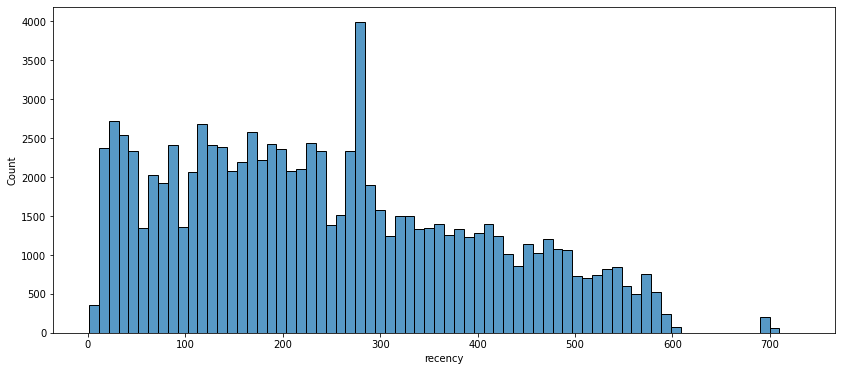

In [52]:
plt.figure(figsize = (14, 6))
ax = sns.histplot(rfm_info.recency, kde = False)

Исходя из распределение можно сделать границы метрики Recency такими:
    - Оценка 3: с момента последнего заказа прошло менее 100 дней
    - Оценка 2: последний заказ сделан от 100 до 300 дней
    - Оценка 1: последний заказ сделан больше 300 дней

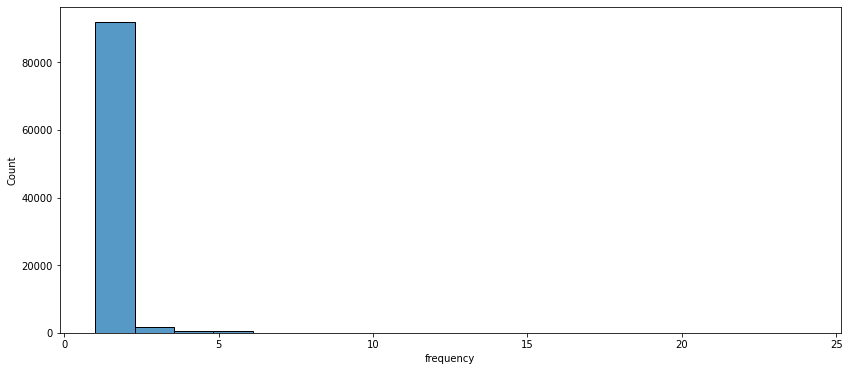

In [53]:
plt.figure(figsize = (14, 6))
ax = sns.histplot(rfm_info.frequency, kde = False)

In [54]:
rfm_info.frequency.value_counts()

1     82923
2      8917
3      1666
4       626
5       243
6       195
7        46
8        16
11       11
10       11
9        10
12        9
14        3
13        2
15        2
20        2
21        1
16        1
18        1
24        1
Name: frequency, dtype: int64

Исходня из распределения Frequency можно сделать градацию:
    - Оценка 1: Пользователь совершил только 1 заказ
    - Оцнека 2: Пользователь совершил от 2 до 6 заказов
    - Оценка 3: Пользователь совершил больше 6 заказов

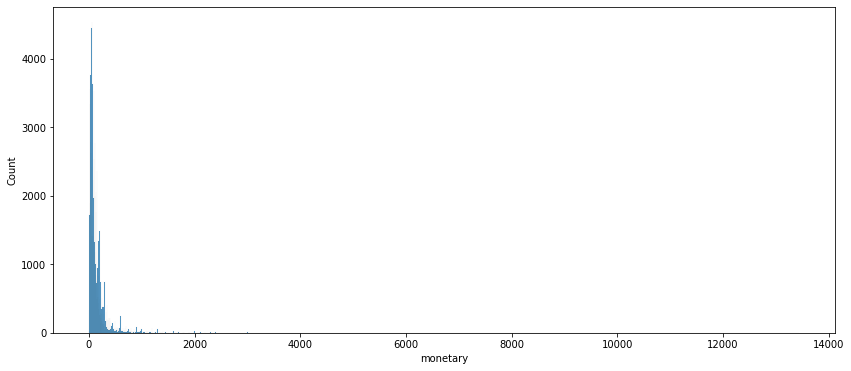

In [55]:
plt.figure(figsize = (14, 6))
ax = sns.histplot(rfm_info.monetary, kde = False)

С первого вгляда, по распределение не понятно как лучше установить границы. Поэтому воспользуюсь квантилями для оценки.

In [56]:
rfm_info.monetary.quantile([0.33, 0.66])

0.33     57.99
0.66    124.99
Name: monetary, dtype: float64

Получим такие границы:
    - Оценка 1: Пользовател совершил покупок на стоимость менее 58.00
    - Оценка 2: Пользователь совершил покупки от 58.00 до 124.99
    - Оценка 3: Пользователь совершил покупки на сумму более 124.99

In [57]:
def r_score(x):
    if x < 100:
        return 3
    elif x <= 300:
        return 2
    else:
        return 1

In [58]:
def f_score(x):
    if x == 1:
        return 1
    elif x <= 6:
        return 2
    else:
        return 3

In [59]:
def m_score(x):
    if x < 58.00:
        return 1
    elif x <= 124.99:
        return 2
    else:
        return 3

In [60]:
rfm_info['r'] = rfm_info.recency.apply(lambda x: r_score(x))
rfm_info['f'] = rfm_info.frequency.apply(lambda x: f_score(x))
rfm_info['m'] = rfm_info.monetary.apply(lambda x: m_score(x))

In [61]:
rfm_info['rfm_score'] = rfm_info['r'].map(str) + rfm_info['f'].map(str) + rfm_info['m'].map(str)

In [62]:
rfm_info

,customer_unique_id,recency,frequency,monetary,r,f,m,rfm_score
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90,2,1,3,213
1,0000b849f77a49e4a4ce2b2a4ca5be3f,120,1,18.90,2,1,1,211
2,0000f46a3911fa3c0805444483337064,543,1,69.00,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,327,1,25.99,1,1,1,111
4,0004aac84e0df4da2b147fca70cf8255,294,1,180.00,2,1,3,213
...,...,...,...,...,...,...,...,...
94681,fffcf5a5ff07b0908bd4e2dbc735a684,453,2,1570.00,1,2,3,123
94682,fffea47cd6d3cc0a88bd621562a9d061,268,1,64.89,2,1,2,212
94683,ffff371b4d645b6ecea244b27531430a,574,1,89.90,1,1,2,112
94684,ffff5962728ec6157033ef9805bacc48,125,1,115.00,2,1,2,212


*Посмотрим на распределение клинтов по очкам RFM*

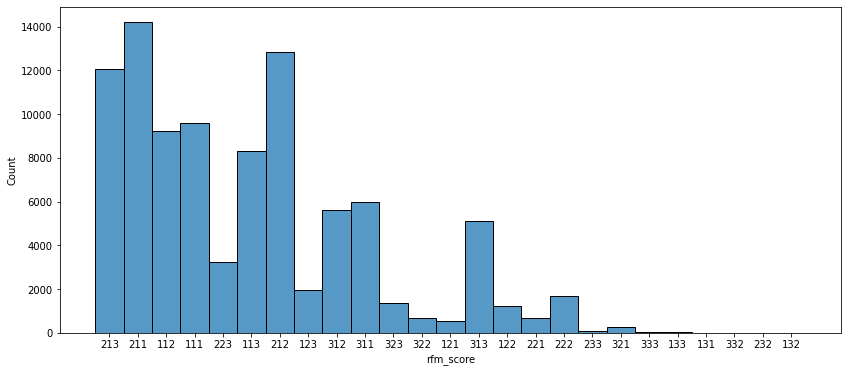

In [63]:
plt.figure(figsize=(14, 6))
sns.histplot(rfm_info.rfm_score)

In [64]:
rfm_info.rfm_score.nunique()

25

Всего вышло 25 уникальных комбинаций RFM для пользователей. Далее необходимо разбить их по сегментам.

### 6.3 Сегментация пользователей по RFM-метрикам

*На данном этапе попробую присвоить сегменты пользователям, исходя из RFM-score*

| Сегмент | Описание | RFM-оценка |
| ----------- | ----------- | ----------- |
| Чемпионы (champions)  | Последняя покупка недавно, покупают часто, тратят много  | 333, 332 |
| Лояльные клиенты (loyal customers) | Покупали давно, много на средний чек  | 233, 232, 313 |
| Новые клиенты (recent customers) | Купили недавно, мало | 312, 311 |
| Потенциальные лояльные (potential loyalist)  | Покупали недавно, но небольшое количество  | 321, 322, 323 |
| Требющие внимания (need attention)  | Показатели средний, покупали не так давно  | 221, 223, 222, 213 |
| Спящие (hibernating)  | Покупали давно и мало | 111, 112 |
| Риск потярять (at risk)  | Покупали давно, выше среднего  | 121, 122, 123, 211, 212, 131 |
| Нельзя терять (can't lose)  | Покупали давно, но много | 132, 133 |

Теперь, присвоим сегменты в итоговый датафрейм через функцию:

In [65]:
def assign_segments(rfm_score):
    if rfm_score in ["333", "332"]:
        return 'champions'
    elif rfm_score in ['233', '232', '313']:
        return 'loyal customers'
    elif rfm_score in ['312', '311']:
        return 'recent customers'
    elif rfm_score in ['321', '322', '323']:
        return 'potential loyalists'
    elif rfm_score in ['221', '223', '222', '213']:
        return 'need attention'
    elif rfm_score in ['111', '112', '113']:
        return 'hibernating'
    elif rfm_score in ['121', '122', '123', '211', '212', '131']:
        return 'at risk'
    elif rfm_score in ['132', '133']:
        return "can't lose"
    else:
        return 'NN'

In [66]:
rfm_info['segments'] = rfm_info.rfm_score.apply(lambda x: assign_segments(x))

In [67]:
rfm_info.head()

,customer_unique_id,recency,frequency,monetary,r,f,m,rfm_score,segments
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90,2,1,3,213,need attention
1,0000b849f77a49e4a4ce2b2a4ca5be3f,120,1,18.90,2,1,1,211,at risk
2,0000f46a3911fa3c0805444483337064,543,1,69.00,1,1,2,112,hibernating
3,0000f6ccb0745a6a4b88665a16c9f078,327,1,25.99,1,1,1,111,hibernating
4,0004aac84e0df4da2b147fca70cf8255,294,1,180.00,2,1,3,213,need attention


**Теперь можно построить столбчатую диаграмму для каждого сегмента**

In [68]:
seg_cust = rfm_info \
    .groupby('segments', as_index = False) \
    .agg({'rfm_score': 'count'})

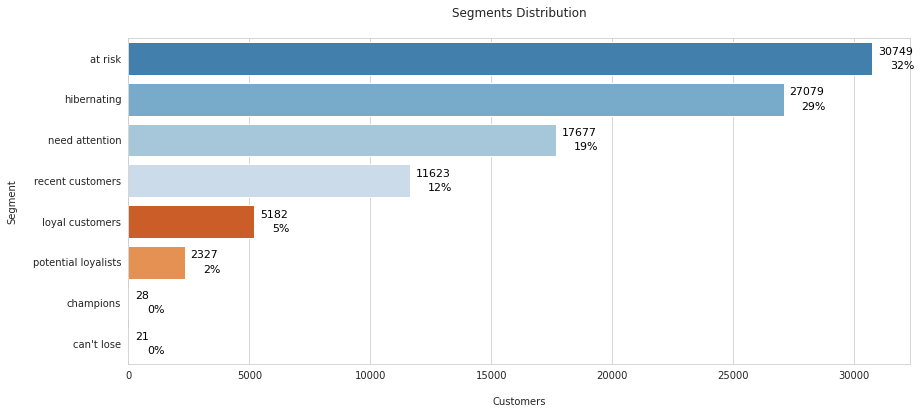

In [69]:
plt.figure(figsize = (14, 6))
sns.set_style("whitegrid")
ax = sns.barplot(data = seg_cust, x = 'rfm_score', y = 'segments', orient = 'h',
            order = seg_cust.sort_values('rfm_score', ascending = False)['segments'],
            palette="tab20c")
plt.title('Segments Distribution\n')
plt.xlabel('\nCustomers')
plt.ylabel('Segment\n')

# Добавление числовых значений над каждым баром
for i in ax.patches:
    # Получение координат бара и добавление числового значения
    ax.text(i.get_width() + 250, i.get_y() + 0.3, str(round(i.get_width())), fontsize=11, color='black')
    ax.text(i.get_width() + 750, i.get_y() + 0.65, (str(round(i.get_width() / rfm_info.customer_unique_id.nunique() * 100))+ str('%')), fontsize=11, color='black')


- Вывод: Заметно, что большое количество пользователей уже неактивно - 29%, а доминирующий сегмент пользователей - группа риска, т.е. которые скоро перейдут в "сон". Бизнесу необходимо предпринять меры для "возвращения" этих клиентов.

### Посмотрим, какая средняя монетизация для каждого Recency Score и Frequence Score

In [70]:
pvt = rfm_info.pivot_table(index = 'r', columns = 'f', values = 'monetary', aggfunc = 'mean')

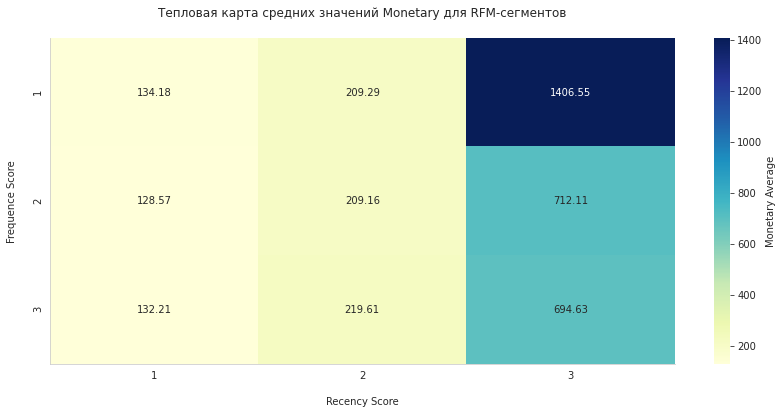

In [71]:
plt.figure(figsize = (14, 6))
sns.heatmap(data = pvt, cmap='YlGnBu', annot=True, fmt='.2f', cbar_kws={'label': 'Monetary Average'})

plt.title('Тепловая карта средних значений Monetary для RFM-сегментов\n')
plt.xlabel('\nRecency Score')
plt.ylabel('Frequence Score\n')

sns.despine()

- Вывод: самая большая монетизация у клиентов, которые сделали свой последний заказ недавно, но кол-во покупок у них самое низкое. RF - 31

# Вывод:
    1. У данного магазина доминирующая группа клиентов, которая сделала только 1 заказ в магазине. Вероятно, магазину нужно обратить на это внимание и попыться привлекать клиентов разными методами (акции, скидки и т.п.).
    
    2. У магазина очень слабый Retention Rate. Это означает, что небольшая часть пользователей возвращается в магазин за повторными покупками. Как было сказано ранее, необходимо предпринимать некоторые шаги для удержания клиентов.
    
    3. Из RFM-анализа видно, что доминирующие кластеры(группы) пользователей - это те, которые "спят", т.е. купили очень давно и только один раз. Также, группа "риск", где пользователи находятся на грани "сна" и группа "внимание". Магазину необходимо принять меры для того, чтобы пользователь: 1 - Вернулся в магазин; 2 - Начал заказывать больше товаров; 3 - Делал это на регулярной основе.